In [ ]:
# quantitative_indicators_prediction

[*********************100%%**********************]  1 of 1 completed
/home/tikam/stock-market/env3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression MAE: 110.51354277763797
Random Forest MAE: 15.444536031087239


/home/tikam/stock-market/env3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gradient Boosting MAE: 11.69860657423006
K Neighbors MAE: 96.09332275390626
MLP Regressor MAE: 652728.6176505628
Bagging Regressor MAE: 16.140833536783816


/home/tikam/stock-market/env3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/tikam/stock-market/env3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/tikam/stock-market/env3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoost Regressor MAE: 11.86274398319307


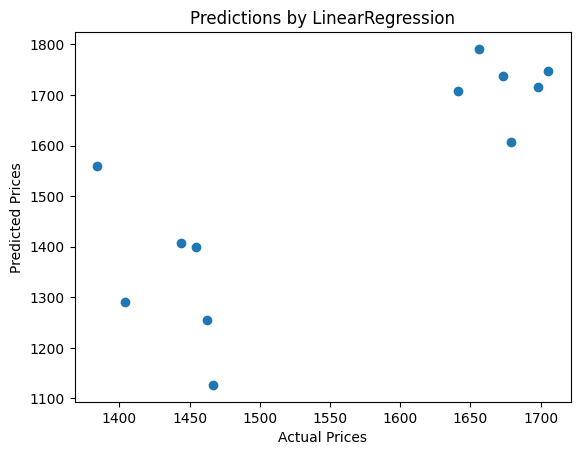

In [4]:
import pandas as pd
import datetime
import yfinance as yf
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Ticker and date range for stock data
ticker = 'HDFCBANK.NS'
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()

# Retrieve stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Calculate additional features (SMA, Bollinger Bands, Donchian Channels)
for sma_period in [5, 10, 20, 50, 100, 200]:
    df[f'SMA_{sma_period}'] = df['Close'].rolling(sma_period).mean()

# Add Bollinger Bands
for band in [10, 20]:
    df[f'BollingerBand_Up_{band}_2'] = df['Close'].rolling(band).mean() + 2 * df['Close'].rolling(band).std()
    df[f'BollingerBand_Down_{band}_2'] = df['Close'].rolling(band).mean() - 2 * df['Close'].rolling(band).std()

# Add Donchian Channels
for channel_period in [5, 10, 20, 50, 100, 200]:
    df[f'Donchian_Channel_Up_{channel_period}'] = df['High'].rolling(channel_period).max()
    df[f'Donchian_Channel_Down_{channel_period}'] = df['Low'].rolling(channel_period).min()

# Prepare data for models
newdata = df[['Close']].join(df.shift(1), rsuffix='_shifted')
newdata['target'] = newdata['Close'].shift(-5)
newdata.dropna(inplace=True)

# Split data into features and target variable
X = newdata.drop('target', axis=1)
Y = newdata['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train and compare multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'K Neighbors': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=5000),
    'Bagging Regressor': BaggingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

# Train models and evaluate their performance
for name, model in models.items():
    if name in ['Random Forest', 'Gradient Boosting', 'MLP Regressor', 'Bagging Regressor', 'AdaBoost Regressor']:
        grid_search = RandomizedSearchCV(model, {}, cv=5, scoring="neg_mean_absolute_error")
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {mae}")

# Plot predictions of the best model
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Predictions by {best_model.__class__.__name__}")
plt.show()
